In [164]:
# Classified candidate in disease or non-disease group based on identified biomarkers.

#Importing necessary libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler


In [97]:
#open file
disease= scipy.io.loadmat('problemA_data.mat')['D']
non_disease= scipy.io.loadmat('problemA_data.mat')['N']

In [177]:
#Take a look at the data
# print(disease)
print(non_disease)

[[10.52099952  9.87151828]
 [10.37595544 10.12027827]
 [11.41891751  9.79921548]
 [10.79681219 10.17117766]
 [10.7946958  10.01458133]
 [ 9.20585396 10.42958745]
 [10.01568738 10.1787073 ]
 [10.43246258  9.98664959]
 [11.51796017  9.70844258]
 [10.4984914   9.65685203]
 [ 9.6132779  10.28136615]
 [ 9.41541354  9.71264522]
 [10.061446   10.31679141]
 [ 9.65015629 10.29515027]
 [10.44403902 10.43811735]
 [ 9.3122013  10.37868439]
 [11.03799924 10.1660104 ]
 [ 9.90839621 10.41119077]
 [11.34795973  9.93847306]
 [11.11999656  9.78328892]
 [10.19907404 10.23209568]
 [ 9.87760376 10.73505545]
 [ 8.9012401  10.52916397]
 [ 8.63071191 10.46108991]
 [ 9.3587167   9.68903208]
 [ 9.87846981 10.53303841]
 [ 9.71032973 10.16080195]
 [ 9.53655999 10.46746719]
 [10.56369912 10.29489191]
 [10.24093937  9.73551102]
 [11.00607393  9.65235974]
 [ 9.58756167 10.52988648]
 [10.51941102  9.90173464]
 [10.38242757 10.05809225]
 [10.45642261  9.81377606]
 [10.76701388 10.17198315]
 [10.12552719  9.95105816]
 

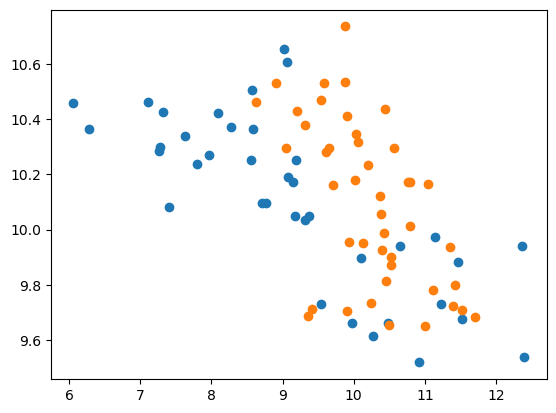

In [122]:
#Plotting the data from the two groups

plt.scatter(disease[:,0], disease[:,1])
plt.scatter(non_disease[:,0], non_disease[:,1])
plt.show()


In [159]:
#- 1) Display the covariance matrices of each group, D and N. 
#For this section, Benoit said to use numpy.swapxes
#also read numpy covariance for more tips

#numpy.swapaxes 

disease_swapaxes= np.swapaxes(disease,1,0)

#Testing the code
#print(disease_swapaxes)

non_disease_swapaxes= np.swapaxes(non_disease,1,0)

#Redifining the covariance variables for each group
cov_d= np.cov(disease_swapaxes) #covariance of group D
cov_n= np.cov(non_disease_swapaxes) #covariance of group N

#print the covariance of group D and N 
print("Covariance matrix of disease:\n", cov_d)
print("")
print("Covariance matrix of disease:\n", cov_n)

print("")



Covariance matrix of disease:
 [[ 2.55845544 -0.37258218]
 [-0.37258218  0.09561274]]

Covariance matrix of disease:
 [[ 0.53446557 -0.12443014]
 [-0.12443014  0.09016302]]

The mean vector of Group D (Disease) is [ 9.1333223  10.10810746]
The mean vector of Group N (Non-disease) is [10.21915408 10.09575653]


In [325]:
#- 2) Perform PCA for both D and N

# Create PCA instances for both groups
pca_d = PCA() #PCA for group D: Disease
pca_n = PCA() #PCA for group N: Non-Disease

# Fit PCA on both groups
pca_d.fit(disease)
pca_n.fit(non_disease)

#Test Eigens value and Eigen vector for each group
evalue_d = pca_d.explained_variance_
print("Eigenvalues of group D:", evalue_d)
evector_d= pca_d.components_
print("Eigenvectors of group D:", evector_d)

print("")
evalue_n = pca_n.explained_variance_
print("Eigenvalues of group N:", evalue_n)
evector_n= pca_n.components_
print("Eigenvectors of group N:", evector_n)
print("")

# Sort eigenvalues of both groups
sorted_evalue_d = np.sort(pca_a.explained_variance_)[::-1]
sorted_evalue_n = np.sort(pca_b.explained_variance_)[::-1]
print("Sorted Eigen value for group D", sorted_evalue_d)
print("Sorted Eigen value for group N", sorted_evalue_n)

# Calculate the minimum number of top eigenvalues that compose 90% of total energy
energy_d = sum(sorted_evalue_d)
energy_n = sum(sorted_evalue_n)
cumsum_d = np.cumsum(sorted_evalue_d)
cumsum_n = np.cumsum(sorted_evalue_n)
min_num_evalue_d = np.argmax(cumsum_d >= 0.9*energy_d) + 1
min_num_evalue_n = np.argmax(cumsum_n >= 0.9*energy_n) + 1

print("")

print(f"Minimum number of top eigenvalues that compose 90% of total energy for group A: {min_num_evalue_d}")
print(f"Minimum number of top eigenvalues that compose 90% of total energy for group B: {min_num_evalue_n}")

Eigenvalues of group D: [2.61358608 0.0404821 ]
Eigenvectors of group D: [[ 0.98922913 -0.14637532]
 [ 0.14637532  0.98922913]]

Eigenvalues of group N: [0.5669396  0.05768898]
Eigenvectors of group N: [[-0.96759068  0.25252383]
 [-0.25252383 -0.96759068]]

Sorted Eigen value for group D [2.61358608 0.0404821 ]
Sorted Eigen value for group N [0.5669396  0.05768898]

Minimum number of top eigenvalues that compose 90% of total energy for group A: 1
Minimum number of top eigenvalues that compose 90% of total energy for group B: 1


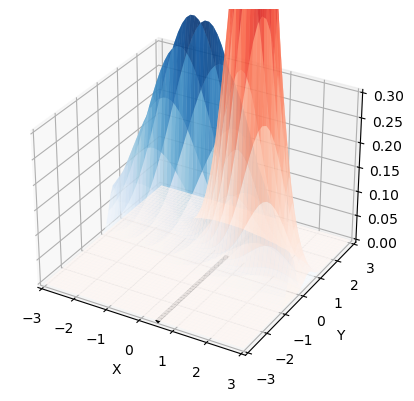

In [316]:
#- 3) 3D surface plot that shows the PDFs

# Define the mean vectors of the two groups
# mean_a = [0, 0]
# mean_b = [1, 1]

#Calculate the Mean Vectors of each group
# mean_d= np.mean(disease,axis=0)

# mean_n= np.mean(non_disease, axis=0)

mean_d = [0, 0]
mean_n = [1, 1]

# mean_d = disease.mean(axis=0)
# mean_n = non_disease.mean(axis=0)

# Define the covariance matrices of the two groups
# cov_a = np.array([[2.55845544, -0.37258218], [-0.37258218, 0.09561274]])
# cov_b = np.array([[0.53446557, -0.12443014], [-0.12443014, 0.09016302]])

# Define the x and y ranges for the plot
x_range = np.linspace(-3, 3, 50)
y_range = np.linspace(-3, 3, 50)
x, y = np.meshgrid(x_range, y_range)

# Evaluate the PDFs at each point in the x-y grid for both groups
z_d = multivariate_normal.pdf(np.dstack((x, y)), mean=mean_d, cov=cov_d)
z_n = multivariate_normal.pdf(np.dstack((x, y)), mean=mean_n, cov=cov_n)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for group A
ax.plot_surface(x, y, z_d, cmap='Blues', alpha=0.7)

# Plot the surface for group B
ax.plot_surface(x, y, z_n, cmap='Reds', alpha=0.7)

# Plot the decision boundary as a black line
ax.plot([0.5, 0.5], [-3, 3], [0, 0], color='black', lw=3)

# Set the axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 0.3])

# Show the plot
plt.show()

Text(0.5, 1.0, '')

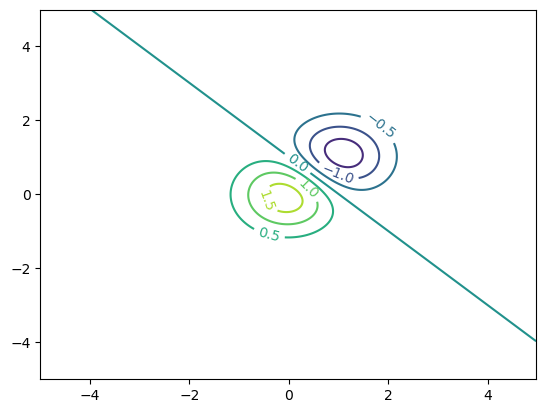

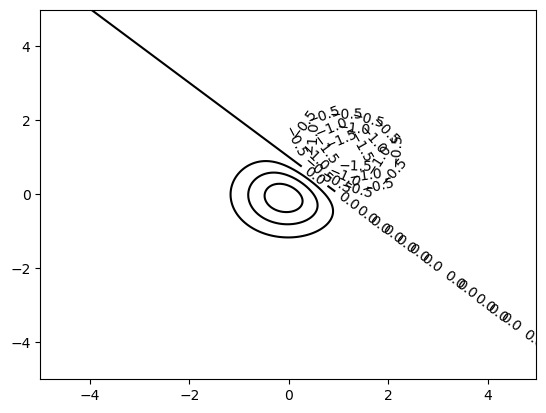

In [334]:
#- 4) Calculate the bayesian decision function for deciding between groups D and N.
#Due this hand or by code.

# x= disease
x = np.arange(-5.0, 5.0, delta)
# y= non_disease
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('')

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, colors ='k')
manual_locations = disease
ax.clabel(CS, inline=True, fontsize=10, manual=manual_locations)
ax.set_title('')

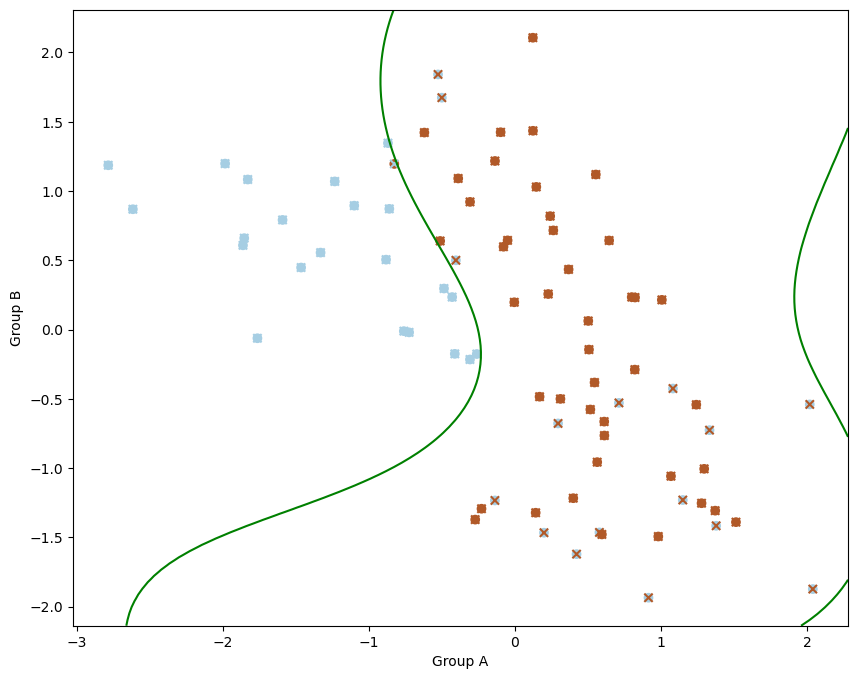

Accuracy: 0.7926829268292683


In [333]:
#- 5) Train an SVM classifier for your data

# Combine the Group D and Group N data
concatenated_data = np.vstack((disease, non_disease))

#Creating the labels
labels = np.hstack((np.zeros(38), np.ones(44)))

concatenated_data = StandardScaler().fit_transform(concatenated_data) #normalizing the data

clf = svm.SVC(kernel='rbf') #the SVM classifier with a radial basis kernel

# Set the class weight 
class_weight = {0: 1, 1: 1.5}
clf.set_params(class_weight=class_weight)

clf.fit(concatenated_data, labels) #trained classifier
predicted_labels = clf.predict(concatenated_data) #label prediction


# Plotting the data
plt.figure(figsize=(10, 8))
plt.scatter(concatenated_data[:, 0], concatenated_data[:, 1], c=labels, cmap=plt.cm.Paired)
plt.scatter(concatenated_data[:, 0], concatenated_data[:, 1], c=predicted_labels, marker='x', cmap=plt.cm.Paired)
plt.xlabel('Group A')
plt.ylabel('Group B')

# Plotting the SVM decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='green', levels=[0], linestyles=['-'])

plt.show()

# Accuracy Calculation
accuracy = np.mean(predicted_labels == labels)

print("Accuracy:", accuracy)